# ANOVA

## Задача 2

Рассмотрим модель $X_{ij} = \mu + \alpha_i + \beta_j + \xi_{ij}$. Будем проверять ошибки на нормальность следующим образом:
* Сначала вычтем из каждого элемента глобальное среднее (избавимся от $\mu$)
* Из каждого элемента $X_{ij}$ вычтем $\overline{X_i}$ (среднее по строке), чем уберём влияние особенностей $i$-го объекта ($\alpha_i$)
* Из каждого элемента $X_{ij}$ вычтем $\overline{X_j}$ (среднее по столбцу), чем избавимся от влияния $j$-го уровня фактора ($\beta_j$)
* Полученные значения проверим на нормальность одним из имеющихся критериев (sps.shapiro, sps.normaltest, sps.jarque_bera и т.д.)

## Задача 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import pandas as pd
import ast
import seaborn as sns
%matplotlib inline

In [2]:
with open('hw7t3.txt', 'r') as fl:
    data = np.array(eval(fl.read()))

In [3]:
data = np.array(data)

In [4]:
np.unique(data[:, 1])

array(['Analgine', 'Codeine', 'Iodomarine', 'Irunine', 'Mildronate',
       'Permetrine'], dtype='<U13')

In [5]:
X1 = np.array(data[:,2][data[:,1] == 'Analgine'].astype(np.float64))
X2 = np.array(data[:,2][data[:,1] == 'Codeine'].astype(np.float64))
X3 = np.array(data[:,2][data[:,1] == 'Iodomarine'].astype(np.float64))
X4 = np.array(data[:,2][data[:,1] == 'Irunine'].astype(np.float64))
X5 = np.array(data[:,2][data[:,1] == 'Mildronate'].astype(np.float64))
X6 = np.array(data[:,2][data[:,1] == 'Permetrine'].astype(np.float64))

Посмотрим на данные.

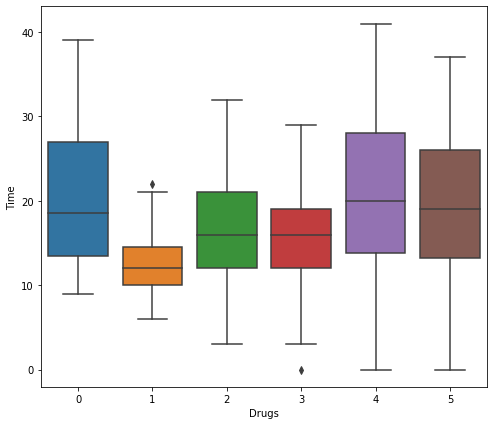

In [6]:
plt.figure(figsize=(8, 7))
sns.boxplot(data=[X1, X2, X3, X4, X5, X6])
plt.xlabel('Drugs')
plt.ylabel('Time')
plt.show()

In [7]:
sps.normaltest(data[:, 2].astype(np.float64))

NormaltestResult(statistic=3.3014439715103467, pvalue=0.19191130136470072)

In [8]:
print(X1.shape, np.var(X1))
print(X2.shape, np.var(X2))
print(X3.shape, np.var(X3))
print(X4.shape, np.var(X4))
print(X5.shape, np.var(X5))
print(X6.shape, np.var(X6))

(30,) 73.31222222222223
(23,) 12.752362948960304
(29,) 49.429250891795476
(21,) 47.95011337868481
(24,) 94.81770833333333
(24,) 93.44270833333333


Видим, что отношение наибольшей выборочной дисперсии к наименьшей не превосходит 10, а объёмы выборок примерно одинаковы.
$N - k - 1 = 151 - 6 - 1 - 144 > 20 \Rightarrow$ предположения метода выполнены.

In [9]:
sps.f_oneway(X1, X2, X3, X4, X5, X6)

F_onewayResult(statistic=3.4492042716869205, pvalue=0.005643006932348378)

In [10]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Таким образом, используя критерий Фишера, мы отвергаем гипотезу о равенстве средних на уровне 0.05.

Теперь рассмотрим попарно:

In [11]:
print(pairwise_tukeyhsd(data[:, 2].astype(np.float32), data[:, 1], alpha=0.05))

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower    upper  reject
-------------------------------------------------------------
  Analgine    Codeine  -7.6072  0.011 -14.0698 -1.1447   True
  Analgine Iodomarine  -3.5713   0.53  -9.6436  2.5011  False
  Analgine    Irunine  -5.0524 0.2442 -11.6868   1.582  False
  Analgine Mildronate  -0.0583    0.9  -6.4442  6.3275  False
  Analgine Permetrine  -1.3083    0.9  -7.6942  5.0775  False
   Codeine Iodomarine    4.036 0.4761  -2.4747 10.5467  False
   Codeine    Irunine   2.5549    0.9   -4.483  9.5927  False
   Codeine Mildronate   7.5489 0.0203   0.7449  14.353   True
   Codeine Permetrine   6.2989 0.0871  -0.5051  13.103  False
Iodomarine    Irunine  -1.4811    0.9  -8.1625  5.2002  False
Iodomarine Mildronate   3.5129 0.5996  -2.9217  9.9475  False
Iodomarine Permetrine   2.2629    0.9  -4.1717  8.6975  False
   Irunine Mildronate    4.994 0.3088  -1.9735 11.9616  False
   Iruni

Выходит, что все лекарства действуют так же как ирунин, он же плацебо, а значит, лекарства не дают положительного эффекта.

## Задача 4

In [12]:
data = np.load('hw7t4.npy')
data.shape

(250, 3)

In [13]:
np.unique(data[:, 0])

array([0., 1., 2., 3., 4.])

In [14]:
np.unique(data[:, 1])

array([0., 1., 2., 3., 4.])

In [15]:
from statsmodels.stats.multitest import multipletests

Приведём данные к удобному представлению и проверим выборки на нормальность и равенство дисперсий.

In [16]:
X = np.zeros((5, 5, 10))
pvals = np.zeros(25)
for i in range(5):
    for j in range(5):
        data_i = data[data[:, 0] == i]
        X[i][j] = data_i[data_i[:, 1] == j][:, 2]
        std = X[i][j].std()
        mean = X[i][j].mean()
        pvals[i*5 + j] = sps.kstest(X[i][j], sps.norm(loc=mean, scale=std).cdf)[1]
multipletests(pvals, alpha=0.05, method='holm')[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [17]:
sps.bartlett(*np.vstack((X[0], X[1], X[2], X[3], X[4])))

BartlettResult(statistic=63.86139765108315, pvalue=1.7853006082480802e-05)

In [18]:
print(np.var(X[0]))
print(np.var(X[1]))
print(np.var(X[2]))
print(np.var(X[3]))
print(np.var(X[4]))

2.459530702713452
1.7556442378221226
2.345612354967821
2.6224114049528278
2.5784747029901185


Таким образом, принимаем гипотезу о нормальности выборок, но отвергаем гипотезу о равенстве дисперсий на уровне значимости 0.05. Но диспесии отличаются не очень сильно, да и у нас нет ничего, кроме критерия Фишера, так что будем пользоваться им.

In [30]:
n = 10
m = 5
k = 5

In [31]:
X_j = np.mean(X, axis=2).mean(axis=1)
X_l = np.mean(X, axis=2).mean(axis=0)
X_jl = np.mean(X, axis = 2)
X_mean = np.mean(X)

In [32]:
S1 = n*m / (k-1) * np.sum((X_j - X_mean)**2)
S2 = n*k / (m-1) * np.sum((X_l - X_mean)**2)
S12 = n / ((k-1)*(m-1)) * np.sum((X_jl - X_j[:,np.newaxis] - X_l[np.newaxis:,] + X_mean)**2)
S_int = 1 / (k * m * (n-1)) * np.sum((X - X_jl[:,:,np.newaxis])**2)

In [33]:
F1 = S1 / S_int
F2 = S2 / S_int
F12 = S12 / S_int

In [34]:
pvals = np.zeros(3)
pvals[0] = sps.f.sf(F1, k-1, k * m * (n-1))
pvals[1] = sps.f.sf(F2, m-1, k * m * (n-1))
pvals[2] = sps.f.sf(F12, (k-1) * (m-1), k * m * (n-1))

In [35]:
multipletests(pvals, alpha=0.05, method='holm')[0]

array([ True,  True, False])

Получаем, что оба фактора влияют на значения признака, но между ними нет взаимодействия (на уровне значимости 0.05).